In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_theme(style='white', palette=None)

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
# mpl.rcParams['font.weight'] =  'bold'

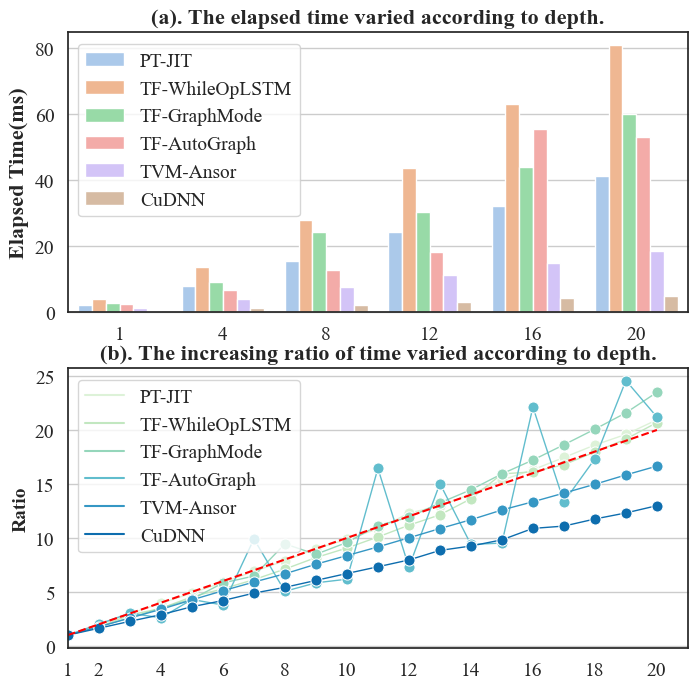

In [2]:
df1 = pd.read_table(
    'perf_with_increased_depth_subplot1.tsv',
    header=0,
    sep='\t',
    usecols=['Depth', 'TestName', 'AvgTime', 'Throughput', 'Ratio'])

fig, axes = plt.subplots(2, figsize=(8, 8))

g = sns.barplot(
    ax=axes[0],
    data=df1,
    x='Depth',
    y='AvgTime',
    hue='TestName',
    ci='sd',
    palette='pastel')

g.xaxis.label.set_visible(False)
g.yaxis.grid(True, clip_on=False)
g.set_xlabel('Depth', fontsize=16, fontweight='bold')
g.set_ylabel('Elapsed Time(ms)', fontsize=16, fontweight='bold')
g.tick_params(labelsize=14)

g.legend(
    title='',
    bbox_to_anchor=(0.00, 0.99),
    loc='upper left',
    fontsize=14,
    title_fontsize=14)
axes[0].set_title(
    '(a). The elapsed time varied according to depth.',
    fontdict={
        'fontsize': 16,
        'fontweight': 'bold'
    })

df2 = pd.read_table(
    'perf_with_increased_depth_subplot2.tsv',
    header=0,
    sep='\t',
    usecols=['Depth', 'TestName', 'AvgTime', 'Throughput', 'Ratio'])

x_vs = [v - 1 for v in df2['Depth']]
palette = sns.color_palette('GnBu', 6)
g = sns.lineplot(
    ax=axes[1],
    x=x_vs,
    y='Ratio',
    hue='TestName',
    marker='o',
    palette=palette,
    linewidth=1,
    markersize=8,
    data=df2)

ref_x = list(range(20))
ref_y = list(range(1, 21))
g_ref = sns.lineplot(
    ax=axes[1],
    x=ref_x,
    y=ref_y,
    linewidth=1.5,
    color='red',
    linestyle='--',
    markers=True)

g.set_xlim(1, 20)
g.yaxis.grid(True, clip_on=False)

g.xaxis.label.set_visible(False)

g.legend(
    title='',
    bbox_to_anchor=(0.00, 0.99),
    loc='upper left',
    fontsize=14,
    title_fontsize=14)

g.set_xlabel('Depth', fontsize=14, fontweight='bold')
g.set_ylabel('Ratio', fontsize=14, fontweight='bold')
axes[1].set_title(
    '(b). The increasing ratio of time varied according to depth.',
    fontdict={
        'fontsize': 16,
        'fontweight': 'bold'
    })

g.set_xticks(range(20))
xticks = [str(i) for i in range(1, 21)]
g.set_xticklabels(xticks)
g.tick_params(labelsize=14)

xticks = g.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if (i - 1) % 2:
        xticks[i].set_visible(False)
xticks[0].set_visible(True)

fig = g.figure
fig.savefig('stacked_lstm_perf_with_depth.pdf', dpi=500, bbox_inches='tight')